<a href="https://colab.research.google.com/github/Nazneen-akram/Generative-ai/blob/main/Gemini_Stable_Diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#@title Check for a GPU
#todo fail if this fails

import os

if os.system('nvidia-smi'):
  raise Exception("No GPU found. Access a GPU through Runtime > Change runtime type and try again.")
else:
  # If nvidia-smi runs successfully, confirm that a GPU is present
  print("GPU is present and available.")

GPU is present and available.


In [5]:
#@title Configure Gemini API key

#Access your Gemini API key

import google.generativeai as genai
from google.colab import userdata

gemini_api_secret_name = 'GOOGLE_API_KEY'  # @param {type: "string"}

try:
  GOOGLE_API_KEY=userdata.get(gemini_api_secret_name)
  genai.configure(api_key=GOOGLE_API_KEY)
except userdata.SecretNotFoundError as e:
   print(f'''Secret not found\n\nThis expects you to create a secret named {gemini_api_secret_name} in Colab\n\nVisit https://makersuite.google.com/app/apikey to create an API key\n\nStore that in the secrets section on the left side of the notebook (key icon)\n\nName the secret {gemini_api_secret_name}''')
   raise e
except userdata.NotebookAccessError as e:
  print(f'''You need to grant this notebook access to the {gemini_api_secret_name} secret in order for the notebook to access Gemini on your behalf.''')
  raise e
except Exception as e:
  # unknown error
  print(f"There was an unknown error. Ensure you have a secret {gemini_api_secret_name} stored in Colab and it's a valid key from https://makersuite.google.com/app/apikey")
  raise e

model = genai.GenerativeModel('gemini-pro')

In [14]:
#@title Setup dependencies & pipeline - this takes a bit

%pip install --quiet --upgrade diffusers accelerate mediapy

import mediapy as media, random, sys, torch
from diffusers import AutoPipelineForText2Image

pipe = AutoPipelineForText2Image.from_pretrained(
    "stabilityai/sdxl-turbo",
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16",
    )

pipe = pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [8]:
#@title Use Gemini to create a text prompt with to feed to Stable Diffusion

model = genai.GenerativeModel('gemini-pro')

text = 'Draw a toddler girl holding umbrella in rain' # @param {type:"string"}

prompt = "You are creating a prompt for Stable Diffusion to generate an image. Please generate a text prompt for %s. Only respond with the prompt itself, but embellish it as needed but keep it under 80 tokens." % text
response = model.generate_content(prompt)
response.text

'On a gloomy day, a young girl clad in a vibrant red raincoat and matching boots, stands in the rain. Her bright yellow umbrella shields her from the downpour, and her rosy cheeks contrast with the gray skies. Her eyes sparkle with innocent joy as she gazes upon the raindrops cascading around her.'

  0%|          | 0/50 [00:00<?, ?it/s]


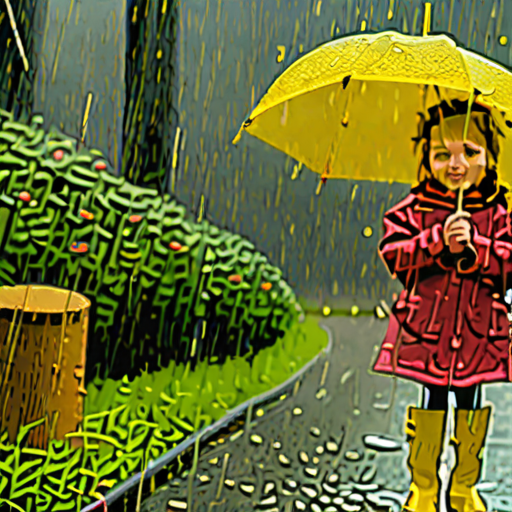

In [10]:
#@title Generate the image with Stable Diffusion

prompt = response.text
seed = random.randint(0, sys.maxsize)

num_inference_steps = 50

images = pipe(
    prompt = prompt,
    guidance_scale = 0.0,
    num_inference_steps = num_inference_steps,
    generator = torch.Generator("cuda").manual_seed(seed),
    ).images

media.show_images(images)

In [ ]:
import random
import torch
from some_image_generation_library import pipe  # Replace with the actual library you're using

# Assuming 'response.text' is your prompt and 'pipe' is your image generation function
prompt = response.text
seed = random.randint(0, sys.maxsize)

num_inference_steps = 50
num_images = 4  # Number of images to generate

# Assuming 'pipe' accepts 'num_return_sequences' as an argument to generate multiple images
# If the pipe function does not support 'num_return_sequences', you'll need to loop manually.
results = pipe(
    prompt=prompt,
    guidance_scale=0.0,
    num_inference_steps=num_inference_steps,
    generator=torch.Generator("cuda").manual_seed(seed),
    num_return_sequences=num_images  # This argument name may vary depending on the API
)

# Display each image in the results
for idx, image in enumerate(results.images):
    print(f"Displaying Image {idx + 1}")
    media.show_images(image)


In [15]:
#@title Generate the image with Stable Diffusion

import mediapy as media
import random
import sys
import torch
from diffusers import AutoPipelineForText2Image




  0%|          | 0/50 [00:00<?, ?it/s]


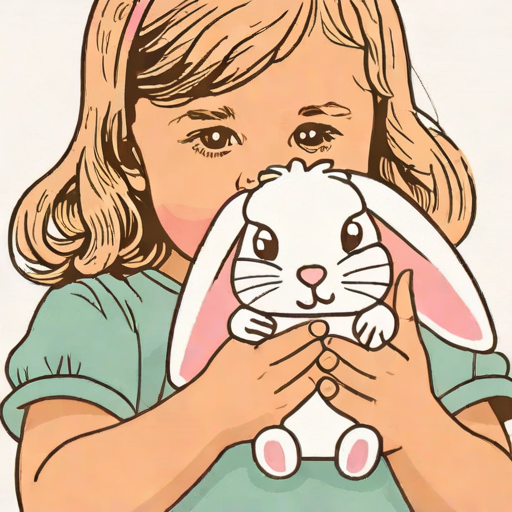

  0%|          | 0/50 [00:00<?, ?it/s]


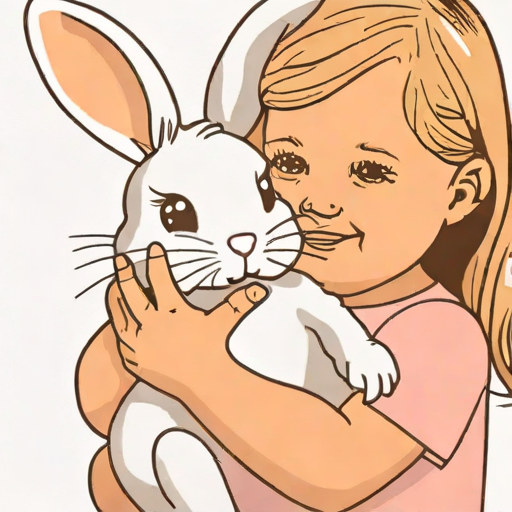

  0%|          | 0/50 [00:00<?, ?it/s]


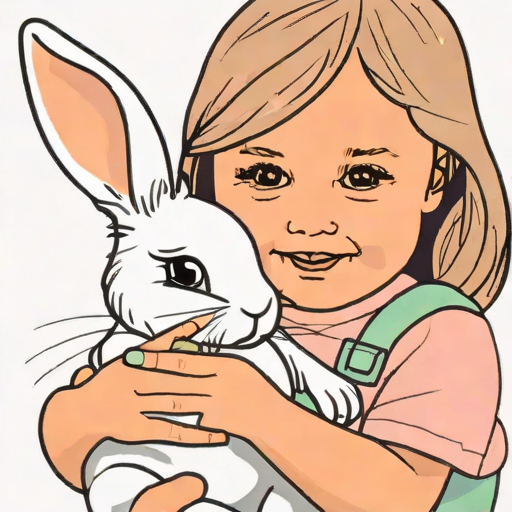

  0%|          | 0/50 [00:00<?, ?it/s]


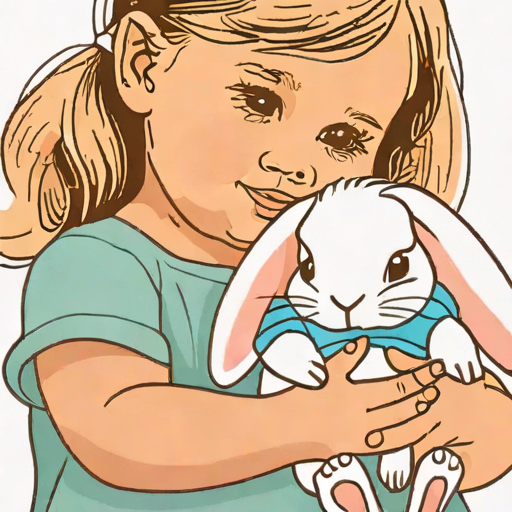

In [16]:
prompt = "Draw a picture of toddler girl holding a cute bunny in her hands"
num_inference_steps = 50
num_images = 4  # The number of images to generate

# Generate and display images
for _ in range(num_images):
    seed = random.randint(0, sys.maxsize)
    generator = torch.Generator("cuda").manual_seed(seed)
    images = pipe(prompt=prompt, num_inference_steps=num_inference_steps, generator=generator).images
    media.show_images(images)

  0%|          | 0/50 [00:00<?, ?it/s]


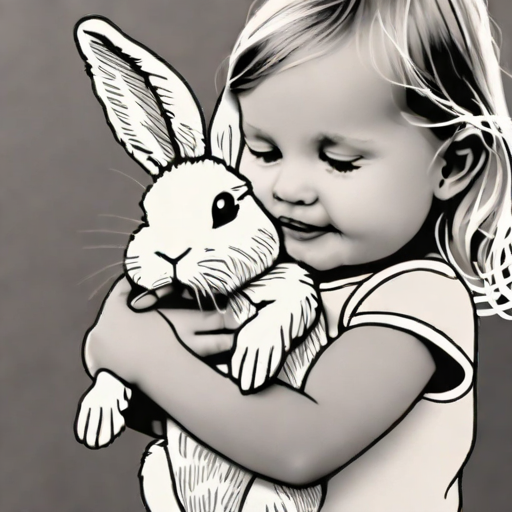

  0%|          | 0/50 [00:00<?, ?it/s]


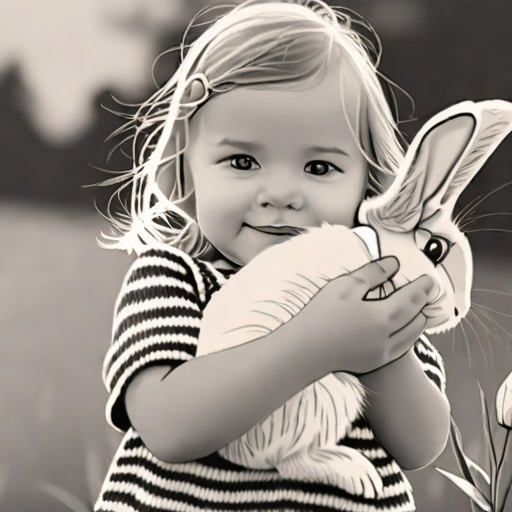

  0%|          | 0/50 [00:00<?, ?it/s]


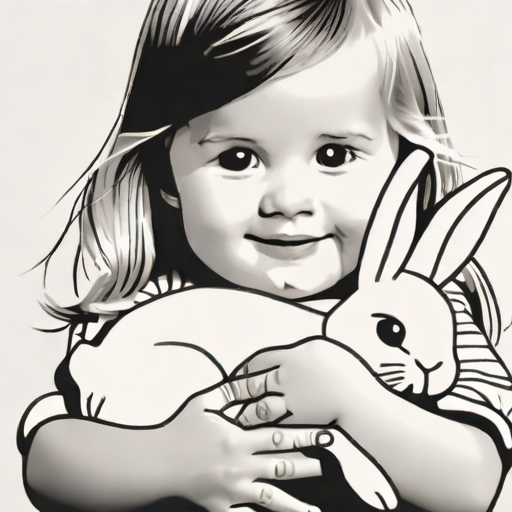

  0%|          | 0/50 [00:00<?, ?it/s]


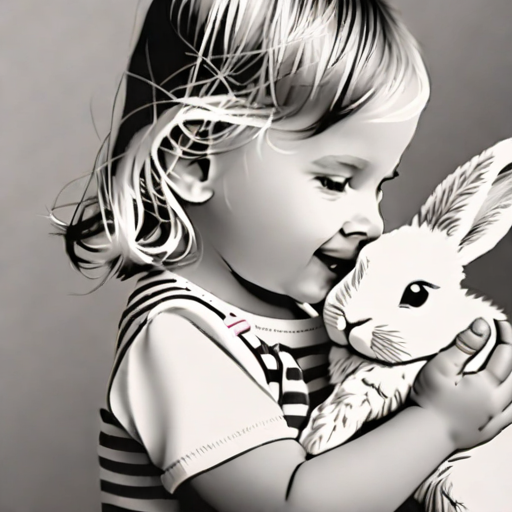

In [17]:
prompt = "Draw a black and white picture of toddler girl holding a cute bunny in her hands"
num_inference_steps = 50
num_images = 4  # The number of images to generate

# Generate and display images
for _ in range(num_images):
    seed = random.randint(0, sys.maxsize)
    generator = torch.Generator("cuda").manual_seed(seed)
    images = pipe(prompt=prompt, num_inference_steps=num_inference_steps, generator=generator).images
    media.show_images(images)

In [19]:
prompt = "Draw a black and white outline of a toddler girl holding a cute chick in her hands"
num_inference_steps = 50
num_images = 4  # The number of images to generate
download_links = []  # To store download links

# Generate images
for i in range(num_images):
    seed = random.randint(0, sys.maxsize)
    generator = torch.Generator("cuda").manual_seed(seed)
    images = pipe(prompt=prompt, num_inference_steps=num_inference_steps, generator=generator).images

    # Save each image
    for idx, image in enumerate(images):
        # Define the image file path
        image_path = f"/content/sample_data/images/image_{i}_{idx}.png"

        # Save the image
        image.save(image_path)

        # Add the download link
        download_links.append(image_path)

# Print download links
for link in download_links:
    print(f"Download link: {link}")


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Download link: /content/sample_data/images/image_0_0.png
Download link: /content/sample_data/images/image_1_0.png
Download link: /content/sample_data/images/image_2_0.png
Download link: /content/sample_data/images/image_3_0.png


/content/sample_data/images/image_0_0.png

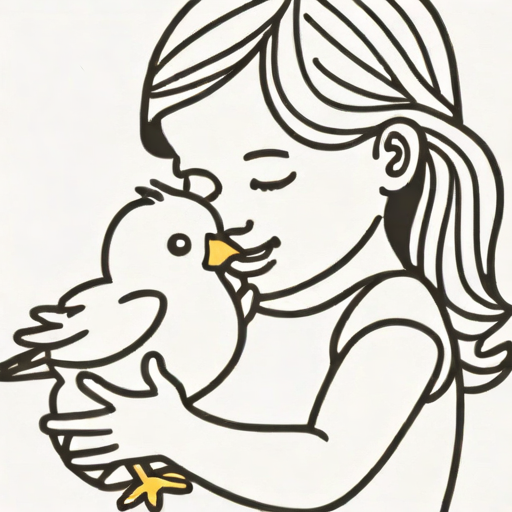

In [21]:
from IPython.display import Image

# Display the image at the specified path
Image("/content/sample_data/images/image_0_0.png")


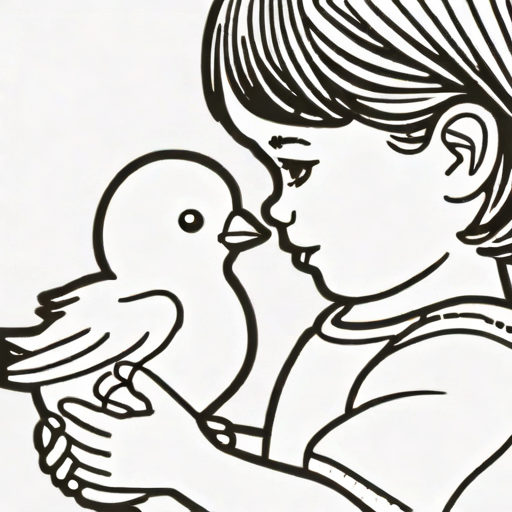

In [22]:
# Display the image at the specified path
Image("/content/sample_data/images/image_1_0.png")

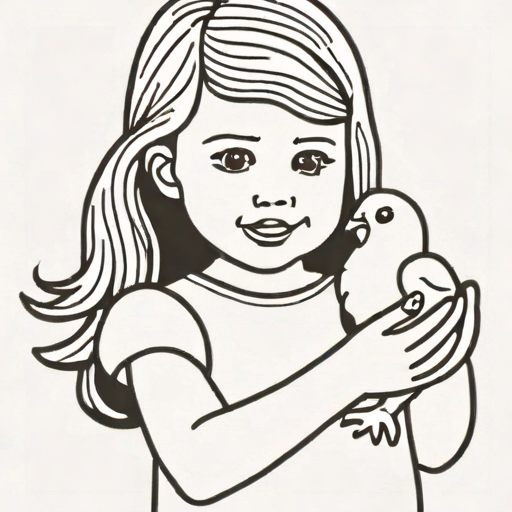

In [23]:
# Display the image at the specified path
Image("/content/sample_data/images/image_2_0.png")

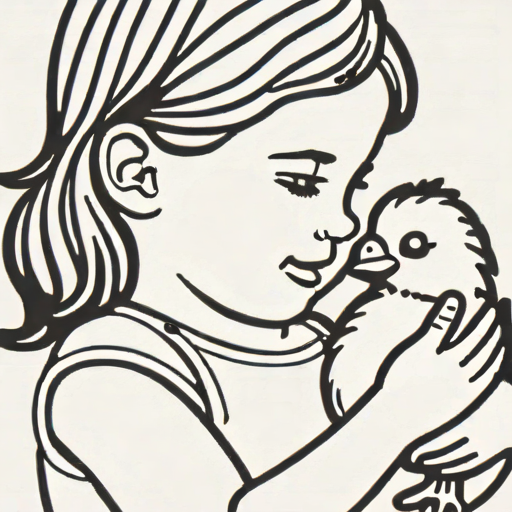

In [24]:
# Display the image at the specified path
Image("/content/sample_data/images/image_3_0.png")